In [3]:
!pip install chess
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.1/149.1 kB 2.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
import chess
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load the data
data = pd.read_csv('chess.csv')

# Preprocess the data
columns_to_keep = ['white_rating', 'black_rating', 'moves', 'turns', 'opening_name', 'victory_status']
columns_to_remove = [col for col in data.columns if col not in columns_to_keep]

# Filter out games with less than 10 turns
data = data[data['turns'] >= 15]

# Get target value
y = data['winner']

# Encode target to numerical
outcome_mapping = {'black': 0, 'draw': 1, 'white': 2}
y = data['winner'].map(outcome_mapping)

# Drop all columns that are not useful
data = data.drop(columns=columns_to_remove)

# Normalize white and black rating
scaler = MinMaxScaler()
data[['white_rating', 'black_rating']] = scaler.fit_transform(data[['white_rating', 'black_rating']])

# Label encode opening name
label_encoder = LabelEncoder()
data['opening_name'] = label_encoder.fit_transform(data['opening_name'])

# Label encode victory status
status_encoder = LabelEncoder()
data['victory_status'] = status_encoder.fit_transform(data['victory_status'])



In [36]:
data

,turns,victory_status,white_rating,black_rating,moves,opening_name
1,16,3,0.280793,0.257642,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,745
2,61,1,0.371608,0.388100,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,646
3,61,1,0.341858,0.362991,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,984
4,95,1,0.385699,0.371179,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,778
6,33,3,0.384134,0.346070,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,90
...,...,...,...,...,...,...
20053,24,3,0.473382,0.235262,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,190
20054,82,1,0.234342,0.222162,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,952
20055,35,1,0.227035,0.271288,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,969
20056,109,3,0.300626,0.239083,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,801


In [21]:
# Function to convert moves to a chess board state
def moves_to_board_all(moves):
    move_list = moves.split()

    board = chess.Board()

    move_list = moves.split()
    for move in move_list:
        board.push_san(move)
    return board

def moves_to_board(moves, move_count):
    move_list = moves.split()

    board = chess.Board()

    move_list = moves.split()
    for i in range(move_count):
        board.push_san(move_list[i])
    return board

# Function to convert a chess board state to a tensor
def board_to_tensor(board):
    piece_indices = {'P': 0, 'R': 1, 'N': 2, 'B': 3, 'Q': 4, 'K': 5,
                     'p': 6, 'r': 7, 'n': 8, 'b': 9, 'q': 10, 'k': 11}
    tensor = np.zeros((8, 8, 12))

    for i in range(64):
        piece = board.piece_at(i)
        if piece:
            x, y = 7 - (i // 8), i % 8
            tensor[x, y, piece_indices[piece.symbol()]] = 1

    return tensor

In [62]:
# Convert the moves to board states and tensors
move_counts = [10, 15]

X_all = np.array([board_to_tensor(moves_to_board_all(moves)) for moves in data['moves']])

X_n = []

for n in move_counts:
  print(n)
  X_n.append(np.array([board_to_tensor(moves_to_board(moves, n)) for moves in data['moves']]))
X_n.append(X_all)


10
15


,turns,victory_status,white_rating,black_rating,moves,opening_name,state
1,16,3,0.280793,0.257642,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,745,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0..."
2,61,1,0.371608,0.388100,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,646,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
3,61,1,0.341858,0.362991,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,984,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
4,95,1,0.385699,0.371179,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,778,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
6,33,3,0.384134,0.346070,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,90,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
...,...,...,...,...,...,...,...
20053,24,3,0.473382,0.235262,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,190,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0..."
20054,82,1,0.234342,0.222162,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,952,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
20055,35,1,0.227035,0.271288,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,969,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0..."
20056,109,3,0.300626,0.239083,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,801,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."


In [65]:
import tensorflow as tf
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

accs = []
fi = []

# Keras API callback function
class FeatureImportanceCallback(tf.keras.callbacks.Callback):
  def __init__(self, train_data):
      self.train_data = train_data
  
  def on_train_begin(self, logs=None):
      self.feature_importance = []
  
  def on_epoch_end(self, epoch, logs=None):
      # Get the feature importance from the first convolutional layer
      first_conv_layer = self.model.layers[0]
      filters = first_conv_layer.get_weights()[0]
      importance = tf.reduce_mean(tf.abs(filters), axis=(0,1,2)).numpy()
      self.feature_importance = importance
  def on_train_end(self, logs=None):
      # Save feature importances to a file or any other storage medium
      fi.append(self.feature_importance)

for X in X_n:
  # Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a neural network model using TensorFlow

  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(8, 8, 12)),
      tf.keras.layers.MaxPooling2D((2, 2)),
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(3, activation='softmax')
  ])

  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  # Create a callback object for metrics
  fi_callback = FeatureImportanceCallback(X_train)

  # Train the neural network model on the training data
  model.fit(X_train, y_train, epochs=10, callbacks=[fi_callback])

  # Evaluate the model on the testing data
  test_loss, test_acc = model.evaluate(X_test, y_test)
  print('Test accuracy:', test_acc)
  accs.append(test_acc)

Epoch 1/10
476/476 [==============================] - 6s 9ms/step - loss: 0.8534 - accuracy: 0.4985
Epoch 2/10
476/476 [==============================] - 3s 5ms/step - loss: 0.8430 - accuracy: 0.5244
Epoch 3/10
476/476 [==============================] - 3s 5ms/step - loss: 0.8370 - accuracy: 0.5377
Epoch 4/10
476/476 [==============================] - 4s 9ms/step - loss: 0.8304 - accuracy: 0.5518
Epoch 5/10
476/476 [==============================] - 4s 7ms/step - loss: 0.8242 - accuracy: 0.5564
Epoch 6/10
476/476 [==============================] - 2s 5ms/step - loss: 0.8175 - accuracy: 0.5632
Epoch 7/10
476/476 [==============================] - 3s 5ms/step - loss: 0.8113 - accuracy: 0.5705
Epoch 8/10
476/476 [==============================] - 2s 5ms/step - loss: 0.8051 - accuracy: 0.5756
Epoch 9/10
476/476 [==============================] - 3s 5ms/step - loss: 0.7988 - accuracy: 0.5835
Epoch 10/10
119/119 [==============================] - 1s 4ms/step - loss: 0.8489 - accuracy: 0.5196

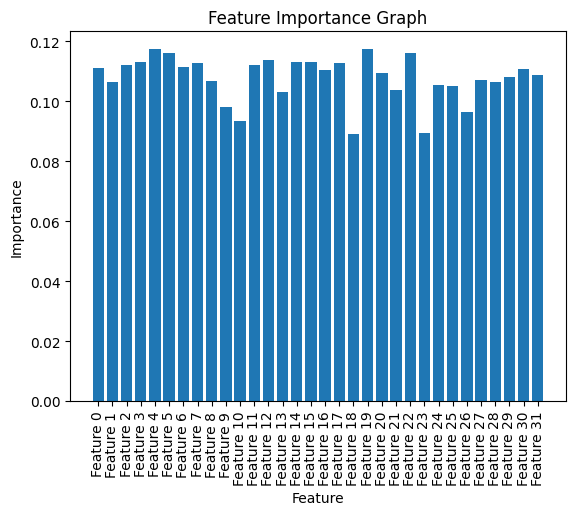

In [67]:
# get columns for plot
feature_names = [f'Feature {i}' for i in range(len(fi[0]))]

# feature importance
feature_importance = fi[0]

plt.bar(feature_names, feature_importance)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Graph')
plt.show()

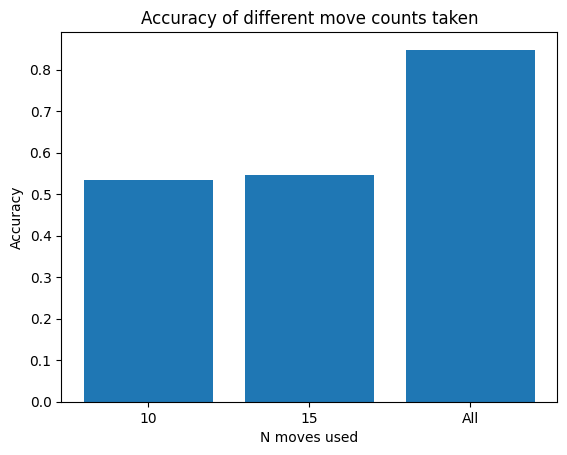

In [25]:
import matplotlib.pyplot as plt

# model names
n_moves = ['10', '15', 'All']

# model accuracies
accuracies = accs

# set the bar chart properties
plt.bar(n_moves, accuracies)

# set the x-axis label
plt.xlabel('N moves used')

# set the y-axis label
plt.ylabel('Accuracy')

# set the title of the graph
plt.title('Accuracy of different move counts taken')

# show the plot
plt.show()
